In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!pip install -U torch torchvision
!pip install git+https://github.com/facebookresearch/fvcore.git
!git clone https://github.com/facebookresearch/detectron2 detectron2_repo
!pip install -e detectron2_repo

Requirement already up-to-date: torch in /usr/local/lib/python3.6/dist-packages (1.3.1)
Requirement already up-to-date: torchvision in /usr/local/lib/python3.6/dist-packages (0.4.2)
  Cloning https://github.com/facebookresearch/fvcore.git to /tmp/pip-req-build-h0renjp0
  Running command git clone -q https://github.com/facebookresearch/fvcore.git /tmp/pip-req-build-h0renjp0
     |████████████████████████████████| 266kB 4.0MB/s 
  Created wheel for fvcore: filename=fvcore-0.1-cp36-none-any.whl size=34200 sha256=bcb2bbebd72489f8e7f9c0fb2813be11b6e1928cb9a23da319bc5f8cd48875b6
  Stored in directory: /tmp/pip-ephem-wheel-cache-j5l7283g/wheels/48/53/79/3c6485543a4455a0006f5db590ab9957622b6227011941de06
  Created wheel for pyyaml: filename=PyYAML-5.2-cp36-cp36m-linux_x86_64.whl size=44209 sha256=7e5538168f013fb2ac53bdc6729202ceb720f94e09004c9f3c4301fccd530b15
  Stored in directory: /root/.cache/pip/wheels/54/b7/c7/2ada654ee54483c9329871665aaf4a6056c3ce36f29cf66e67
Successfully built fvcore py

In [1]:
cd /content/drive/My Drive/pokemon

/content/drive/My Drive/pokemon


In [0]:
import os
import pickle
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import shutil
import random
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
np.random.seed(42)

%matplotlib inline

In [0]:
# backgrounds_path = 'background'
# foregrounds_path = 'images-sugimori'

# backgrounds = os.listdir(backgrounds_path)
# foregrounds = os.listdir(foregrounds_path)

# backgrounds = sorted(backgrounds)
# foregrounds = sorted(foregrounds)
# for i, r in enumerate(foregrounds):
#     try:
#         int(r[:3])
#     except:
#         len_foregrounds = i
#         break
# foregrounds = foregrounds[:len_foregrounds]
# categories = pickle.load(open('categories.pkl', 'rb'))

In [0]:
# img = Image.open('images-sugimori/'+foregrounds[0])#np.random.randint(100)])
# background = Image.open('background/'+backgrounds[0])#np.random.randint(100)])

# # merge foreground into background with a resizegap
# def merge(_foreground, _background, gap):
#     # create a copy, so this wouldn't overwrite *ground
#     foreground = _foreground.copy().convert('RGBA')
#     background = _background.copy()
    
#     w, h = foreground.size
#     W, H = background.size
    
#     neww = W//gap
#     newh = h*W//gap//w
    
#     foreground = foreground.resize((neww, newh))
    
#     # random flip
#     flip = np.random.randint(0, 2)
#     if flip:
#         foreground = foreground.transpose(Image.FLIP_LEFT_RIGHT)
    
#     # random rotate
#     foreground = foreground.rotate(np.random.randint(-180, 181), expand=True)
    
#     # random location
#     old_bbox = foreground.getbbox()
#     w = old_bbox[2]# - old_bbox[0]
#     h = old_bbox[3]# - old_bbox[1]
#     x0 = np.random.randint(0, W - w)
#     y0 = np.random.randint(0, H - h)

#     bbox = [x0, y0, w, h]
#     background.paste(foreground, (x0, y0), foreground)
    
#     return background, bbox

# res, bbox = merge(img, background, gap=9)
# print(bbox)
# #draw = ImageDraw.Draw(res)
# #draw.rectangle(xy=bbox, outline='black')#, fill=(0, 255, 255), outline='red')
# #draw.line((0, 0) + res.size, fill=128)
# #draw.line((0, res.size[1], res.size[0], 0), fill=128)
# plt.imshow(res)
# #res
# #print(help(draw.rectangle))

In [0]:
# #making CATEGORIES
# CATEGORIES = []
# for category_id in categories:
#     CATEGORIES.append({
#         "supercategory": "pokemons",
#         "id": category_id,
#         "name": categories[category_id],
#     })


# #making ANNOTATIONS and IMAGES
# IMAGES = []
# ANNOTATIONS = []

# # maximum number objects in an image
# max_object = 5

# # maximum objects in the whole dataset
# object_count = np.ones(len(foregrounds), dtype=np.uint8) * 200

# # min gap and max gap for resize the image
# min_gap = 3
# max_gap = 10

# num_imgs = 0
# anno_id = 0

# backgrounds_output = 'backgrounds_output'
# if os.path.isdir(backgrounds_output):
#     shutil.rmtree(backgrounds_output)
# os.makedirs(backgrounds_output)

# for image_id, background_path in enumerate(backgrounds):
#     if (image_id + 1) % 1000 == 0:
#         print('Progress: {}/{}, Num images: {}'.format(image_id + 1, len(backgrounds), num_imgs))
        
#     try:
#         full_background_path = os.path.join(backgrounds_path, background_path)
#         background = Image.open(full_background_path)
        
#         # get these object that hasn't reach the maxmimum limit
#         num_object = np.random.randint(1, max_object + 1)
#         non_zero_index = np.where(object_count > 0)[0]
#         if len(non_zero_index) < num_object:
#             num_object = len(non_zero_index)
#         get_indexes = np.random.permutation(len(non_zero_index))[:num_object]
#         indexes = non_zero_index[get_indexes]
#         gaps = np.random.randint(min_gap, max_gap, size=len(indexes))
#         gaps = sorted(gaps)
#         for index, gap in zip(indexes, gaps):
#             object_count[index] -= 1
#             foreground_path = foregrounds[index]
#             full_foreground_path = os.path.join(foregrounds_path, foreground_path)
#             foreground = Image.open(full_foreground_path)
#             background, box = merge(foreground, background, gap)
            
#             box[0] = float(box[0])
#             box[1] = float(box[1])
#             box[2] = float(box[2])
#             box[3] = float(box[3])

#             ANNOTATIONS.append({
#                 "segmentation": [[box[0], box[1], box[0], box[1] + box[3], box[0] + box[2], box[1] + box[3], box[0] + box[2], box[1]]],
#                 "area": (box[2] - box[0]) * (box[3] - box[1]),
#                 "iscrowd": 0,
#                 "image_id": image_id,
#                 "bbox": box,
#                 "category_id": int(foreground_path[:3]),
#                 "id": anno_id,
#             })
#             anno_id += 1
        
#         IMAGES.append({
#             #"license": 4,
#             "file_name": background_path,
#             #"coco_url": "http://images.cocodataset.org/val2017/000000397133.jpg",
#             "height": background.height,
#             "width": background.width,
#             #"date_captured": "2013-11-14 17:02:52",
#             #"flickr_url": "http://farm7.staticflickr.com/6116/6255196340_da26cf2c9e_z.jpg",
#             "id": image_id,
#         })
#         num_imgs += 1
#         output_path = os.path.join(backgrounds_output, background_path)
#         background.save(output_path)
#     except:
#         print(background_path)


In [0]:
# import json
# anno_file = {
#     "categories": CATEGORIES,
#     "images": IMAGES,
#     "annotations": ANNOTATIONS,
# }

# with open('annotations.json', 'w') as f:
#     json.dump(anno_file, f)


In [0]:
# import json

# with open('annotations.json', 'r') as f:
#     test = json.load(f)

# num_classes = len(test['categories'])

In [0]:
# !ln -s "/content/drive/My Drive/pokemon/backgrounds_output" "/backgrounds_output"


ln: failed to create symbolic link '/backgrounds_output/backgrounds_output': Operation not supported


In [3]:
from detectron2.data.datasets import register_coco_instances
dataname = "pokemons"
register_coco_instances(dataname, {}, "annotations.json", "/backgrounds_output")
#register_coco_instances("pokemons", {}, "zai2019_hackaton_train/annotations/ninedash_keypoints_train.json", "zai2019_hackaton_train/images/train/")
metadata = MetadataCatalog.get(dataname)
dataset_dicts = DatasetCatalog.get(dataname)

[12/29 22:12:24 d2.data.datasets.coco]: Loaded 0 images in COCO format from annotations.json


/backgrounds_output/02134.png


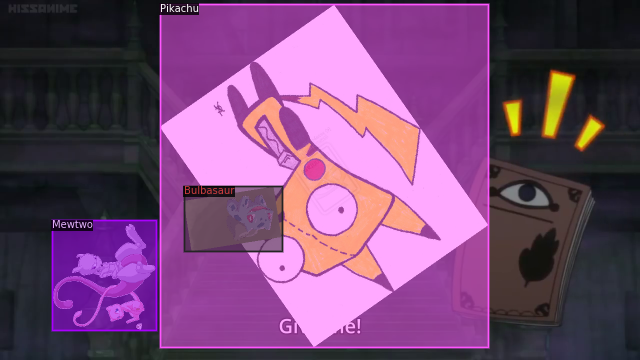

In [0]:
# import random

# for d in random.sample(dataset_dicts, 1):
#     img = cv2.imread(d["file_name"])
#     print(d["file_name"])
#     #print(d['annotations'])
#     visualizer = Visualizer(img[:, :, ::-1], metadata=metadata, scale=0.5)
#     #print(dir(visualizer))
#     #print(help(visualizer.draw_box))
#     vis = visualizer.draw_dataset_dict(d)
#     cv2_imshow(vis.get_image()[:, :, ::-1])

In [4]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os

cfg = get_cfg()
cfg.merge_from_file("/content/detectron2_repo/configs/COCO-Detection/retinanet_R_101_FPN_3x.yaml")
cfg.DATASETS.TRAIN = (dataname,)
cfg.DATASETS.TEST = (dataname, )
cfg.DATALOADER.NUM_WORKERS = 4
cfg.MODEL.WEIGHTS = "detectron2://COCO-Detection/retinanet_R_101_FPN_3x/138363263/model_final_59f53c.pkl"
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.0005
cfg.SOLVER.MAX_ITER = 10000  # 300 iterations seems good enough, but you can certainly train longer
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 32 # faster, and good enough for this toy dataset
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 5#num_classes  # only has one class (NineDash)


os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
#trainer.train()

Loading config /content/detectron2_repo/configs/COCO-Detection/../Base-RetinaNet.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.


WARNING [12/29 22:12:32 d2.config.compat]: Config '/content/detectron2_repo/configs/COCO-Detection/retinanet_R_101_FPN_3x.yaml' has no VERSION. Assuming it to be compatible with latest v2.
[12/29 22:12:42 d2.engine.defaults]: Model:
RetinaNet(
  (backbone): FPN(
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelP6P7(
      (p6): Conv2d(2048, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (p7): Conv2d(256, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    )
    (bottom_up): ResNet(
      (stem): BasicStem(
        (

AssertionError: ignored

In [0]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5 # set the testing threshold for this model
cfg.DATASETS.TEST = (dataname, )
predictor = DefaultPredictor(cfg)

tensor([ 1,  1,  0, 46,  4, 38, 76])
tensor([1])
1.1634376049041748


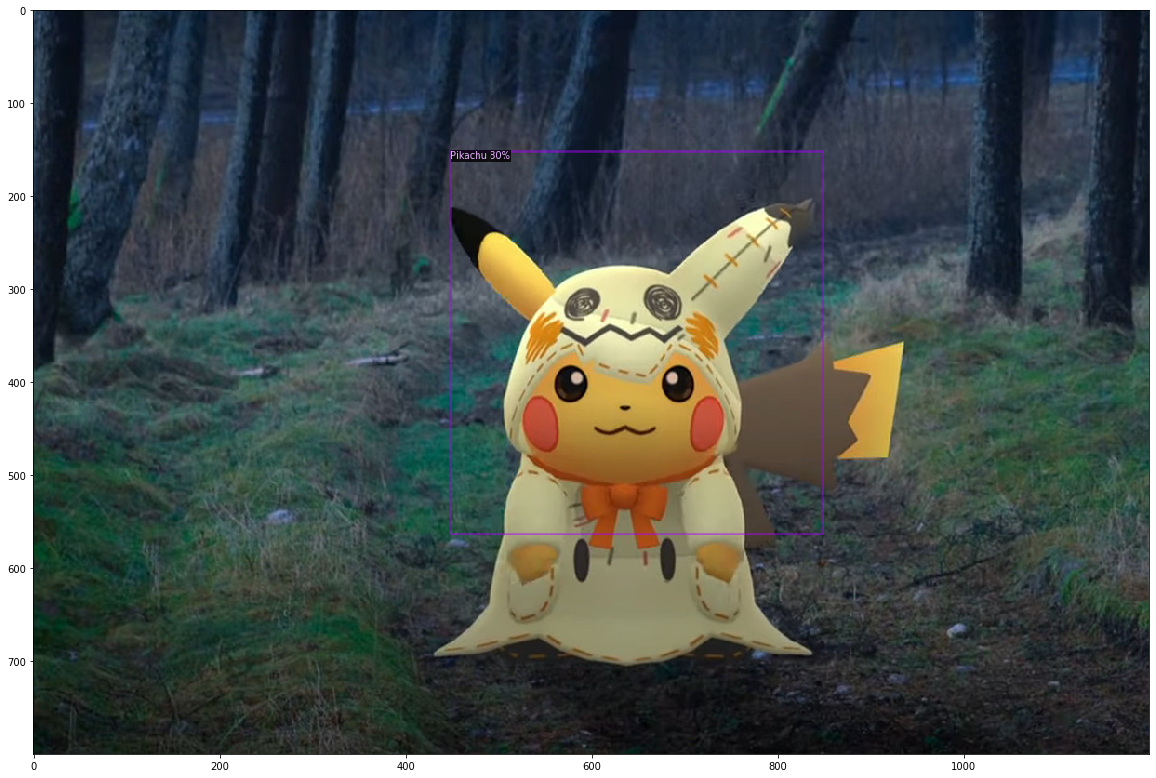

In [7]:
from detectron2.utils.visualizer import ColorMode
from tqdm import tqdm
import time
start = time.time()
for d in range(1):#random.sample(dataset_dicts, 1):
    im = cv2.imread('chrome_2019_10_11_15_08_49.0.png')#d["file_name"])
    outputs = predictor(im)
    if True:#len(outputs['instances'].get_fields()['scores']) != 0:
        #print(outputs)
        v = Visualizer(im[:, :, ::-1],
                    metadata=metadata, 
                    #scale=0.5, 
                    #instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
        )
        #v._instance_mode = None
        #print(v.metadata.get("thing_classes", None))
        #print(dir(v))
        instances = outputs['instances'].to('cpu')
        print(instances.get('pred_classes'))
        thresh = []
        for i, (score, classes) in enumerate(zip(instances.get('scores'), instances.get('pred_classes'))):
            if float(score) >= cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST and float(classes) < 5:
                thresh.append(i)
        
        
        for field in ['scores', 'pred_boxes', 'pred_classes']:
            instances._fields[field] = instances.get(field)[thresh]

        print(instances.get('pred_classes'))
        #s = instances.__getattr__('scores')
        
        v = v.draw_instance_predictions(instances)
        #v = visualizer.draw_dataset_dict()
        #print(outputs)
        #print(dir(v))
        #v = v.draw_box(outputs["instances"].to("cpu"))
        #cv2_imshow(v.get_image()[:, :, ::-1])
        #print(type(v.get_image()))
        break
print(time.time()-start)
plt.figure(figsize=(20,20))
plt.imshow(v.get_image())

In [0]:
!wget 'https://www.blogdot.tv/wp-content/uploads/2018/06/everything-we-know-about-pokemon-lets-go-pikachu-and-eevee.jpg'

--2019-12-26 14:29:14--  https://www.blogdot.tv/wp-content/uploads/2018/06/everything-we-know-about-pokemon-lets-go-pikachu-and-eevee.jpg
Resolving www.blogdot.tv (www.blogdot.tv)... 81.19.159.8
Connecting to www.blogdot.tv (www.blogdot.tv)|81.19.159.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99226 (97K) [image/jpeg]
Saving to: ‘everything-we-know-about-pokemon-lets-go-pikachu-and-eevee.jpg’

everything-we-know- 100%[===================>]  96.90K  --.-KB/s    in 0.05s   

2019-12-26 14:29:14 (1.90 MB/s) - ‘everything-we-know-about-pokemon-lets-go-pikachu-and-eevee.jpg’ saved [99226/99226]



In [0]:
ls

 111.jpg
 annotations.json
 annotations.pkl
 background/
 backgrounds_output/
 categories.pkl
 cha.png
 chrome_2019_10_11_15_08_49.0.png
 dask-worker-space/
 dataset/
 detectron2_repo/
 everything-we-know-about-pokemon-lets-go-pikachu-and-eevee.jpg
 images.pkl
'images?q=tbn:ANd9GcSiTjAKrZZzlZ-SqYA6scUgIh8P-jiMBX6MfZs0HD4TN0y38LAUlQ'
 images-sugimori/
 images-sugimori.zip
 labels.pkl
 maxresdefault.jpg
 maxresdefault.jpg.1
 maxresdefault.jpg.2
 maxresdefault.jpg.3
 model-resnet152/
 models/
 mydataset/
 normal_features.pkl
 normalized_features.pkl
 output/
 phimso.info-pokemon-1-2-3.jpg
 Pikachu_1.jpg
'Pikachu can mimic any Pokemon in existence!-Zx2CBt72Ji8.webm'
 pokemon-generation-one.zip
 Pokemon_Shield_Galarian_Ponyta_.jpg
 Pokemon-Sword-Shield-796x417.jpg
 project.avi
 project.mkv
 SinGAN/
 test_anno.json
 test.png
'Top 10 Pokemon of Ash Ketchum-H4tPmUW_iL0.mkv'
 vzagsopsoc6sfnfeahep.png
 vzagsopsoc6sfnfeahep.png.1
 vzagsopsoc6sfnfeahep.png.2


In [0]:
mv 'campart2xjpg.jpeg?rect=0,93,1200,601' 'test.png'

mv: cannot stat 'campart2xjpg.jpeg?rect=0,93,1200,601': No such file or directory


In [0]:
!youtube-dl 'https://www.youtube.com/watch?v=Zx2CBt72Ji8'

[youtube] Zx2CBt72Ji8: Downloading webpage
[youtube] Zx2CBt72Ji8: Downloading video info webpage
[youtube] Zx2CBt72Ji8: Downloading js player vfl22ubNH
[youtube] Zx2CBt72Ji8: Downloading js player vfl22ubNH
[download] Destination: Pikachu can mimic any Pokemon in existence!-Zx2CBt72Ji8.f248.webm
[download] 100% of 20.54MiB in 00:00
[download] Destination: Pikachu can mimic any Pokemon in existence!-Zx2CBt72Ji8.f251.webm
[download] 100% of 1.83MiB in 00:00
[ffmpeg] Merging formats into "Pikachu can mimic any Pokemon in existence!-Zx2CBt72Ji8.webm"
Deleting original file Pikachu can mimic any Pokemon in existence!-Zx2CBt72Ji8.f248.webm (pass -k to keep)
Deleting original file Pikachu can mimic any Pokemon in existence!-Zx2CBt72Ji8.f251.webm (pass -k to keep)


In [0]:
import cv2
cap = cv2.VideoCapture('Top 10 Pokemon of Ash Ketchum-H4tPmUW_iL0.mkv')
out = cv2.VideoWriter('project.mkv',cv2.VideoWriter_fourcc(*'DIVX'), cap.get(cv2.CAP_PROP_FPS)/5,
                      (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))))

t = 0
while cap.isOpened():
    t += 1
    ret, frame = cap.read()
    if not ret:
        break
    if t % 5 != 0:
        continue

    outputs = predictor(frame)
    v = Visualizer(frame[:, :, ::-1],
                metadata=fruits_nuts_metadata, 
                #scale=0.5, 
                #instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
    )
    instances = outputs['instances'].to('cpu')
    thresh = []
    for i, (score, classes) in enumerate(zip(instances.get('scores'), instances.get('pred_classes'))):
        if float(classes) < 5 and float(score) > 0.0: 
            thresh.append(i)
    for field in ['scores', 'pred_boxes', 'pred_classes']:
        instances._fields[field] = instances.get(field)[thresh]
    v = v.draw_instance_predictions(instances)
    
    im = v.get_image()
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    #if t == 2:
    #plt.imshow(v.get_image())
    #break
    out.write(v.get_image())
    

out.release()
#cap.get(cv2.CAP_PROP_FPS)
#while cap.isOpened():
#size = cap.
    

tensor([], dtype=torch.int64)
tensor([], dtype=torch.int64)
tensor([], dtype=torch.int64)
tensor([], dtype=torch.int64)
tensor([], dtype=torch.int64)
tensor([], dtype=torch.int64)
tensor([], dtype=torch.int64)
tensor([], dtype=torch.int64)
tensor([], dtype=torch.int64)
tensor([], dtype=torch.int64)
tensor([], dtype=torch.int64)
tensor([], dtype=torch.int64)
tensor([], dtype=torch.int64)
tensor([], dtype=torch.int64)
tensor([], dtype=torch.int64)
tensor([], dtype=torch.int64)
tensor([], dtype=torch.int64)
tensor([], dtype=torch.int64)
tensor([], dtype=torch.int64)
tensor([], dtype=torch.int64)
tensor([], dtype=torch.int64)
tensor([], dtype=torch.int64)
tensor([], dtype=torch.int64)
tensor([], dtype=torch.int64)
tensor([], dtype=torch.int64)
tensor([], dtype=torch.int64)
tensor([], dtype=torch.int64)
tensor([], dtype=torch.int64)
tensor([], dtype=torch.int64)
tensor([], dtype=torch.int64)
tensor([], dtype=torch.int64)
tensor([], dtype=torch.int64)
tensor([], dtype=torch.int64)
tensor([],

In [0]:
!youtube-dl https://www.youtube.com/watch?v=H4tPmUW_iL0

[youtube] H4tPmUW_iL0: Downloading webpage
[youtube] H4tPmUW_iL0: Downloading video info webpage
[download] Destination: Top 10 Pokemon of Ash Ketchum-H4tPmUW_iL0.f136.mp4
[download] 100% of 26.49MiB in 00:00
[download] Destination: Top 10 Pokemon of Ash Ketchum-H4tPmUW_iL0.f251.webm
[download] 100% of 6.36MiB in 00:00
[ffmpeg] Merging formats into "Top 10 Pokemon of Ash Ketchum-H4tPmUW_iL0.mkv"
Deleting original file Top 10 Pokemon of Ash Ketchum-H4tPmUW_iL0.f136.mp4 (pass -k to keep)
Deleting original file Top 10 Pokemon of Ash Ketchum-H4tPmUW_iL0.f251.webm (pass -k to keep)


In [0]:
rs = cv2.VideoCapture('project.avi')

In [0]:
ret, frame = rs.read()

ValueError: ignored

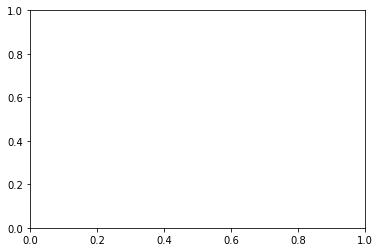

In [0]:
plt.plot(frame)

In [0]:
ls dataset

Abra/        Dragonair/   Gyarados/    Magnemite/  Pidgey/     Snorlax/
Aerodactyl/  Dragonite/   Haunter/     Magneton/   Pikachu/    Spearow/
Alakazam/    Dratini/     Hitmonchan/  Mankey/     Pinsir/     Squirtle/
Arbok/       Drowzee/     Hitmonlee/   Marowak/    Poliwag/    Starmie/
Arcanine/    Dugtrio/     Horsea/      Meowth/     Poliwhirl/  Staryu/
Articuno/    Eevee/       Hypno/       Metapod/    Poliwrath/  Tangela/
Beedrill/    Ekans/       Ivysaur/     Mew/        Ponyta/     Tauros/
Bellsprout/  Electabuzz/  Jigglypuff/  Mewtwo/     Porygon/    Tentacool/
Blastoise/   Electrode/   Jolteon/     Moltres/    Primeape/   Tentacruel/
Bulbasaur/   Exeggcute/   Jynx/        MrMime/     Psyduck/    Vaporeon/
Butterfree/  Exeggutor/   Kabuto/      Muk/        Raichu/     Venomoth/
Caterpie/    Farfetchd/   Kabutops/    Nidoking/   Rapidash/   Venonat/
Chansey/     Fearow/      Kadabra/     Nidoqueen/  Raticate/   Venusaur/
Charizard/   Flareon/     Kakuna/      Nidorina/   Rattat

(-0.5, 154.5, 161.5, -0.5)

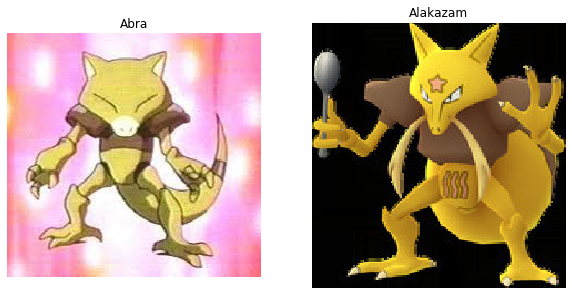

In [0]:
img1 = Image.open('dataset/Abra/0282b2f3a22745f1a436054ea15a0ae5.jpg')
img2 = Image.open('dataset/Alakazam/0bdefe16e8734bf0a8653ec64123ffe9.jpg')

plt.figure(figsize=(10, 20))
plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title('Abra')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.title('Alakazam')
plt.axis('off')

(-0.5, 598.5, 799.5, -0.5)

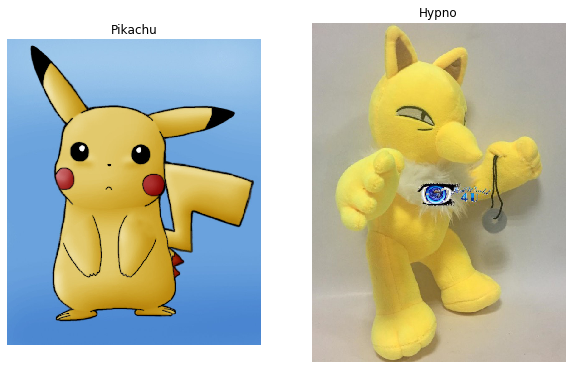

In [0]:
img1 = Image.open('dataset/Pikachu/00000000.jpg')
img2 = Image.open('dataset/Hypno/0965b43428a5448b9ba66715eaf5d1cc.jpg')

plt.figure(figsize=(10, 20))
plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title('Pikachu')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.title('Hypno')
plt.axis('off')

In [0]:
ls dataset/Hypno

01c2ee358495448c8cf1b36446852789.jpg  80fcfd963c9d4b2dbcec06f4147a9139.jpg
01c9d52523c346069258bbb6c5a12d1f.jpg  8312c79893eb48008428f6536a80c3df.jpg
025c539ac60347c08328b3b731b01c2a.jpg  8578e27a55e54c7a877abe5e3490486c.jpg
0965b43428a5448b9ba66715eaf5d1cc.jpg  8cbd482b7cb94df0bab0f748662b6960.jpg
0a797b84d0324947bb5ac5d523b4d1eb.jpg  8d7773bc10024cea9eb9483af7fa8a66.jpg
0b18240f7b9d4e95b2cd558e9bdb993c.jpg  a1706ea03eb043b3af4916657eef8f53.jpg
0f0394c57de7420098d41e1cdb0923b6.jpg  a81affecb4ad4bf48fe923624f0fcc9d.jpg
0f8f57ffebd34d59abf88a4a51f50766.jpg  a8fe2777bfda4b1aab9410fd5e97e45a.jpg
16d82c11d62843c1bf3452dcdbea1b33.jpg  a94e4d249af4458eb5ddb0aa0d1c78a7.jpg
1a00b2e12cc14ded8b35abdd125630e8.jpg  bb08cc53ad90470381caf17b9d979350.jpg
208832caab1045a1a2c14d0861f611e7.jpg  bb60c4727f0f4671b14a6af1250d6f81.jpg
21718cdccfe7487e968287dc9e2dc158.jpg  bbdaec0b719a4687bec963aabf39ef36.jpg
24cf389e46f24c89af051d8b37655d40.jpg  c038c867bf6d4811bf46f248abcb9d24.jpg
28bd169ba3f4405bbf4213c04